In [1]:
!pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.0.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.4
branca                        0.4.2
bs4                           0.0.1
CacheC

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os

ROOT_DIR = '/content'

DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'dog_image')

TRAIN_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'train')

TEST_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'test')

In [5]:
import shutil
import os

try:
  dataset_path = '/content/drive/MyDrive/서울 ict 시각지능 deep learning/data'

  shutil.copy(os.path.join(dataset_path, 'dog_breed_classification.zip'), '/content')

except Exception as err:
  print(str(err))

In [6]:
import os
import shutil

if os.path.exists(DATA_ROOT_DIR):

  shutil.rmtree(DATA_ROOT_DIR)

  print(DATA_ROOT_DIR + ' is removed !!!')

In [7]:
import zipfile

with zipfile.ZipFile(os.path.join(ROOT_DIR, 'dog_breed_classification.zip'), 'r') as target_file:

  target_file.extractall(DATA_ROOT_DIR)

In [8]:
file_path = './dog_image/train/'

In [9]:
label_name_list = os.listdir(file_path)

label_name_list

['jindo', 'yorkshireterrier', 'shepherd', 'chihuahua']

In [10]:
import glob

for label_name in label_name_list:

  file_names = os.listdir(file_path+label_name)

  jpg_list = glob.glob(file_path + label_name +'/*.jpg')
  
  print(label_name)
  print(len(file_names), len(jpg_list))

jindo
146 146
yorkshireterrier
147 147
shepherd
161 161
chihuahua
152 152


renaming

In [11]:
for label_name in label_name_list:
  
  label_dir_name = os.path.join(file_path, label_name)

  print(label_dir_name)

  file_list = os.listdir(label_dir_name)

  count = 1

  for file_name in file_list:

    src_file_name = label_dir_name + '/' + file_name

    dst_file_name = label_dir_name + '/' + label_name + '.' + str(count) + '.jpg'

    os.rename(src_file_name, dst_file_name)

    count = count + 1

  print(count, ' files are renamed !!!')

./dog_image/train/jindo
147  files are renamed !!!
./dog_image/train/yorkshireterrier
148  files are renamed !!!
./dog_image/train/shepherd
162  files are renamed !!!
./dog_image/train/chihuahua
153  files are renamed !!!


In [12]:
import os
import glob
import shutil
import random

ratio = 0.1

count = 0

for label_name in label_name_list: # label_name_list = ['chihuahua', 'shepherd', 'jindo', 'yorkshireterrier']

  dst_label_name_dir = TEST_DATA_ROOT_DIR + '/' + label_name # TEST_DATA_ROOT_DIR = '/content/dog_image/test
  
  if not os.path.exists(dst_label_name_dir): 

    os.mkdir(dst_label_name_dir)
    print(dst_label_name_dir + ' is created !!')
    count = count + 1

print(len(label_name_list), count)

for label_name in label_name_list:

  train_image_file_list = glob.glob(TRAIN_DATA_ROOT_DIR +'/' + label_name + '/*') # glob.glob()는 현재 디렉토리위치 명명

  print(TRAIN_DATA_ROOT_DIR+label_name)
  print(train_image_file_list)

  print('=' * 30)
  print('total [%s] image file nums => [%s]' % (label_name, len(train_image_file_list))) # 
  
  split_num = int(ratio * len(train_image_file_list)) # 
  
  test_image_file_list = train_image_file_list[0:split_num]

  move_nums = 0

  for image_file in test_image_file_list:

    shutil.move(image_file, TEST_DATA_ROOT_DIR + '/' + label_name)

    move_nums += 1

  print('total move nums => ', move_nums)
  print('='*50)

4 0
/content/dog_image/trainjindo
['/content/dog_image/train/jindo/jindo.7.jpg', '/content/dog_image/train/jindo/jindo.134.jpg', '/content/dog_image/train/jindo/jindo.59.jpg', '/content/dog_image/train/jindo/jindo.34.jpg', '/content/dog_image/train/jindo/jindo.53.jpg', '/content/dog_image/train/jindo/jindo.129.jpg', '/content/dog_image/train/jindo/jindo.86.jpg', '/content/dog_image/train/jindo/jindo.121.jpg', '/content/dog_image/train/jindo/jindo.60.jpg', '/content/dog_image/train/jindo/jindo.93.jpg', '/content/dog_image/train/jindo/jindo.23.jpg', '/content/dog_image/train/jindo/jindo.74.jpg', '/content/dog_image/train/jindo/jindo.63.jpg', '/content/dog_image/train/jindo/jindo.30.jpg', '/content/dog_image/train/jindo/jindo.47.jpg', '/content/dog_image/train/jindo/jindo.111.jpg', '/content/dog_image/train/jindo/jindo.140.jpg', '/content/dog_image/train/jindo/jindo.62.jpg', '/content/dog_image/train/jindo/jindo.8.jpg', '/content/dog_image/train/jindo/jindo.11.jpg', '/content/dog_image/tr

In [13]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_data_gen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

val_data_gen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

test_data_gen = ImageDataGenerator(rescale = 1./255)

In [15]:
IMG_WIDTH = 150
IMG_HEIGHT = 150

In [16]:
train_generator = train_data_gen.flow_from_directory(TRAIN_DATA_ROOT_DIR, batch_size = 32, target_size= (IMG_WIDTH, IMG_HEIGHT), class_mode = 'sparse', subset = 'training')

validation_generator = val_data_gen.flow_from_directory(TRAIN_DATA_ROOT_DIR, batch_size = 32, target_size = (IMG_WIDTH, IMG_HEIGHT), class_mode = 'sparse', subset = 'validation')

test_generator = test_data_gen.flow_from_directory(TEST_DATA_ROOT_DIR, batch_size = 32, target_size = (IMG_WIDTH, IMG_HEIGHT), class_mode = 'sparse')

Found 438 images belonging to 4 classes.
Found 108 images belonging to 4 classes.
Found 59 images belonging to 4 classes.


In [17]:
import matplotlib.pyplot as plt
import numpy as np

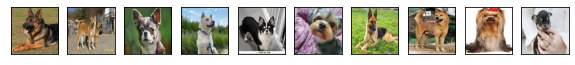

In [18]:
# 확인용
img, label = train_generator.next()

plt.figure(figsize = (10, 10))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.xticks([]); plt.yticks([])

  plt.imshow(img[i])

In [19]:
base_model_mobilenet = MobileNet(weights = 'imagenet', input_shape = (IMG_WIDTH, IMG_HEIGHT, 3), include_top = False) # classifier은 직접 지정

17235968/17225924 [==============================] - 0s 0us/step


In [20]:
base_model_mobilenet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 75, 75, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 75, 75, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 75, 75, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 75, 75, 32)       128       
 ation)                                         

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

In [30]:
model_mobilenet = Sequential()

model_mobilenet.add(base_model_mobilenet)

model_mobilenet.add(GlobalAveragePooling2D())

model_mobilenet.add(Dense(32, activation = 'relu'))
model_mobilenet.add(Dropout(0.25))
model_mobilenet.add(Dense(4, activation = 'softmax'))

model_mobilenet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 32)                32800     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3,261,796
Trainable params: 3,239,908
No

In [31]:
model_mobilenet.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(2e-5), metrics = ['accuracy'])

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

save_file_name = './MyDogClassification_MobileNet_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name,
                             monitor = 'val_loss',
                             save_best_only = False,
                             mode = 'auto',
                             verbose = 1)

earlystopping = EarlyStopping(monitor = 'val_loss',
                              patience = 5,
                              restore_best_weights = True,
                              verbose = 1
                              )

start_time = datetime.now()

hist = model_mobilenet.fit(train_generator, epochs = 50,
                           validation_data = validation_generator,
                           callbacks = [checkpoint, earlystopping])

end_time = datetime.now()

print('elapsed time => ', end_time - start_time)

Epoch 1/50
14/14 [==============================] - ETA: 0s - loss: 1.7324 - accuracy: 0.3584
Epoch 1: saving model to ./MyDogClassification_MobileNet_Colab.h5
14/14 [==============================] - 8s 276ms/step - loss: 1.7324 - accuracy: 0.3584 - val_loss: 1.4553 - val_accuracy: 0.3796
Epoch 2/50
14/14 [==============================] - ETA: 0s - loss: 1.0444 - accuracy: 0.5274
Epoch 2: saving model to ./MyDogClassification_MobileNet_Colab.h5
14/14 [==============================] - 4s 275ms/step - loss: 1.0444 - accuracy: 0.5274 - val_loss: 1.0822 - val_accuracy: 0.5833
Epoch 3/50
14/14 [==============================] - ETA: 0s - loss: 0.6666 - accuracy: 0.7511
Epoch 3: saving model to ./MyDogClassification_MobileNet_Colab.h5
14/14 [==============================] - 3s 207ms/step - loss: 0.6666 - accuracy: 0.7511 - val_loss: 0.8762 - val_accuracy: 0.6759
Epoch 4/50
14/14 [==============================] - ETA: 0s - loss: 0.5163 - accuracy: 0.8196
Epoch 4: saving model to ./MyDogC

low time, but high overfitting, and low val_accuracy

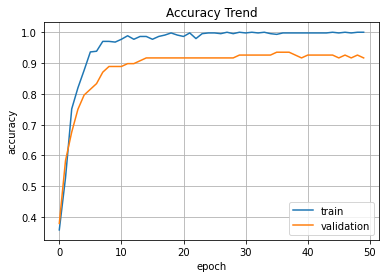

In [33]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

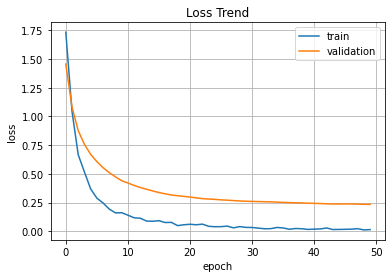

In [34]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

In [35]:
pred = model_mobilenet.predict(test_generator)

In [42]:
img, label = test_generator.next()

len(img)

32

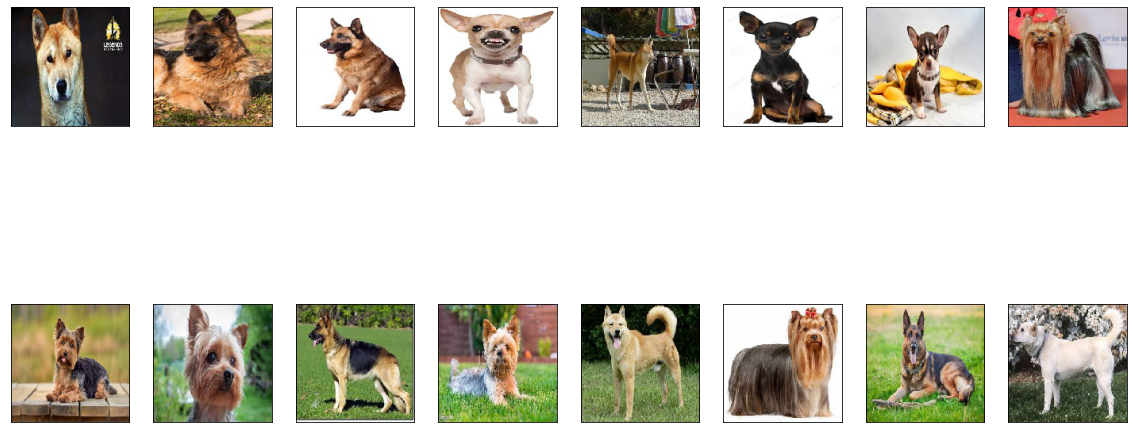

In [43]:
img, label = test_generator.next()


plt.figure(figsize = (20, 10))
for i in range(16):
  plt.subplot(2, 8, i+1)
  plt.xticks([]); plt.yticks([])
  plt.imshow(img[i])

Xception

In [29]:
from tensorflow.keras.applications import Xception

In [44]:
base_model_Xception = Xception(weights = 'imagenet', input_shape = (IMG_WIDTH, IMG_HEIGHT, 3), include_top = False)

83697664/83683744 [==============================] - 1s 0us/step


In [47]:
model_Xception = Sequential()

model_Xception.add(base_model_Xception)

model_Xception.add(GlobalAveragePooling2D())

model_Xception.add(Dense(32, activation = 'relu'))
model_Xception.add(Dropout(0.25))
model_Xception.add(Dense(4, activation = 'softmax'))

model_Xception.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 32)                65568     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 20,927,180
Trainable params: 20,872,652
Non-trainable params: 54,528
_____________________________________

In [50]:
model_Xception.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(2e-5), metrics = ['accuracy'])

In [51]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

save_file_name = './MyDogClassification_MobileNet_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name,
                             monitor = 'val_loss',
                             save_best_only = False,
                             mode = 'auto',
                             verbose = 1)

earlystopping = EarlyStopping(monitor = 'val_loss',
                              patience = 5,
                              restore_best_weights = True,
                              verbose = 1
                              )

start_time = datetime.now()

hist = model_Xception.fit(train_generator, epochs = 50,
                           validation_data = validation_generator,
                           callbacks = [checkpoint, earlystopping])

end_time = datetime.now()

print('elapsed time => ', end_time - start_time)

Epoch 1/50
14/14 [==============================] - ETA: 0s - loss: 1.3614 - accuracy: 0.3059
Epoch 1: saving model to ./MyDogClassification_MobileNet_Colab.h5
14/14 [==============================] - 22s 997ms/step - loss: 1.3614 - accuracy: 0.3059 - val_loss: 1.1796 - val_accuracy: 0.4167
Epoch 2/50
14/14 [==============================] - ETA: 0s - loss: 1.1413 - accuracy: 0.5594
Epoch 2: saving model to ./MyDogClassification_MobileNet_Colab.h5
14/14 [==============================] - 9s 683ms/step - loss: 1.1413 - accuracy: 0.5594 - val_loss: 0.9324 - val_accuracy: 0.6019
Epoch 3/50
14/14 [==============================] - ETA: 0s - loss: 1.0029 - accuracy: 0.6895
Epoch 3: saving model to ./MyDogClassification_MobileNet_Colab.h5
14/14 [==============================] - 10s 688ms/step - loss: 1.0029 - accuracy: 0.6895 - val_loss: 0.7699 - val_accuracy: 0.7222
Epoch 4/50
14/14 [==============================] - ETA: 0s - loss: 0.8379 - accuracy: 0.8082
Epoch 4: saving model to ./MyDo

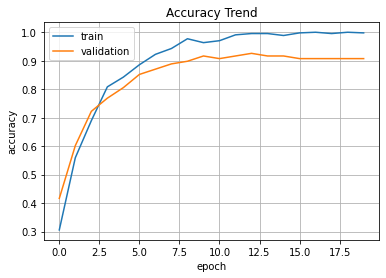

In [52]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

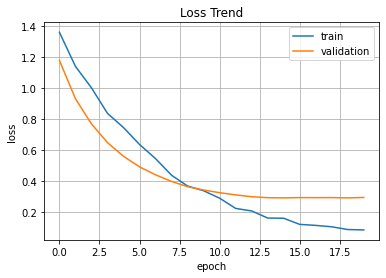

In [53]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

inception_resnet_v2

In [54]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

In [55]:
base_model_inceptionresnet = InceptionResNetV2(include_top = False, weights = 'imagenet', input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)) 

219070464/219055592 [==============================] - 5s 0us/step


In [56]:
base_model_inceptionresnet.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 74, 74, 32)  96          ['conv2d_4[0][0]']               
 rmalization)                                                                                     
                                                                                

In [57]:
model_inceptionresnet = Sequential()

model_inceptionresnet.add(base_model_inceptionresnet)

model_inceptionresnet.add(GlobalAveragePooling2D())

model_inceptionresnet.add(Dense(32, activation = 'relu'))
model_inceptionresnet.add(Dropout(0.25))
model_inceptionresnet.add(Dense(4, activation = 'softmax'))

model_inceptionresnet.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 3, 3, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d_3   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 32)                49184     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 4)                 132       
                                                                 
Total params: 54,386,052
Trainable params: 54,325,508


In [59]:
model_inceptionresnet.compile(optimizer = tf.keras.optimizers.Adam(2e-5), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [60]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

save_file_name = './MyDogClassification_MobileNet_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name,
                             monitor = 'val_loss',
                             save_best_only = False,
                             mode = 'auto',
                             verbose = 1)

earlystopping = EarlyStopping(monitor = 'val_loss',
                              patience = 5,
                              restore_best_weights = True,
                              verbose = 1
                              )

start_time = datetime.now()

hist = model_inceptionresnet.fit(train_generator, epochs = 50,
                           validation_data = validation_generator,
                           callbacks = [checkpoint, earlystopping])

end_time = datetime.now()

print('elapsed time => ', end_time - start_time)

Epoch 1/50
14/14 [==============================] - ETA: 0s - loss: 1.3229 - accuracy: 0.3653
Epoch 1: saving model to ./MyDogClassification_MobileNet_Colab.h5
14/14 [==============================] - 48s 2s/step - loss: 1.3229 - accuracy: 0.3653 - val_loss: 1.2705 - val_accuracy: 0.4444
Epoch 2/50
14/14 [==============================] - ETA: 0s - loss: 1.0031 - accuracy: 0.6484
Epoch 2: saving model to ./MyDogClassification_MobileNet_Colab.h5
14/14 [==============================] - 14s 1s/step - loss: 1.0031 - accuracy: 0.6484 - val_loss: 0.6811 - val_accuracy: 0.6759
Epoch 3/50
14/14 [==============================] - ETA: 0s - loss: 0.8181 - accuracy: 0.8242
Epoch 3: saving model to ./MyDogClassification_MobileNet_Colab.h5
14/14 [==============================] - 14s 1s/step - loss: 0.8181 - accuracy: 0.8242 - val_loss: 0.5191 - val_accuracy: 0.8148
Epoch 4/50
14/14 [==============================] - ETA: 0s - loss: 0.6726 - accuracy: 0.8539
Epoch 4: saving model to ./MyDogClassif

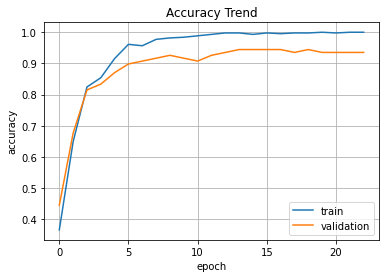

In [61]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

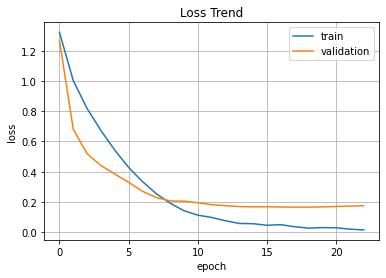

In [62]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

# Documentation
data gathering -> 1.5 hr
data preprocessing -> 3~4 hr
model 1 -> 3 min acc = 91% overfitting high
model 2 -> 3 min acc = 91% overfitting high
model 3 -> 6 min acc = 93% overfitting middle

적은 시간차이로 높은 정확도와 적은 overfitting middle을 가졌으므로 선정.

프로젝트 진행 시 시행착오 및 문제점 : os, shutil, glob 와 관련된 data pre-processing 관련 라이브러리 다루는 스킬이 전반적으로 매우 취약함을 느꼈음.특히, image data의 renaming, training set에서 test set으로의 moving도 어려웠다. predict에 대한 시각화는 많이 연습을 해도 코딩을 어떻게 해야할지 갈피를 잡는 것이 어렵다.

코딩의 방향성을 찾는게 어려웠다. 무엇을 하고 무엇을 하고 무엇을 해야하는지 아키텍쳐를 정확하게 짜고 시작해야 될 것같다. 라이브러리 도구 정리도 필요할듯.(shutil, os) 교수님의 코딩을 읽으면서 이것의 의도를 파악하는데 오랜시간이 걸렸다. 아직 내손으로 직접 만지고 순서 감 익히는 것은 한참 부족하다

수정해야 할 사항 : 반복적으로 작성하여 코드를 눈에 익히고, 구조를 파악하는 연습을 해야함. 변수를 설정할 때 알아보기 쉽게 만들어 헷갈리지 않게 하는 것이 가장 중요함.
